In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import wandb
from absl import app
from absl import flags
import tensorflow as tf
from wandb.keras import WandbCallback
from ml_collections.config_flags import config_flags

# Import modules
from configs import get_config
from data import download_dataset, preprocess_dataset, GetDataloader
from models import SimpleSupervisedModel
from callbacks import GetCallbacks
from pipeline import SupervisedPipeline

In [3]:
# Get configs
configs = get_config()

In [14]:
# Load the dataframes
train_df = download_dataset('train', 'labelled-dataset')
valid_df = download_dataset('val', 'labelled-dataset')

# Preprocess the DataFrames
train_paths, train_labels = preprocess_dataset(train_df)
valid_paths, valid_labels = preprocess_dataset(valid_df)

# Build dataloaders
dataset = GetDataloader(configs)
trainloader = dataset.dataloader(train_paths, train_labels, dataloader_type='train')
validloader = dataset.dataloader(valid_paths, valid_labels, dataloader_type='valid')

In [15]:
# Debug Dataloaders
from utils import ShowBatch

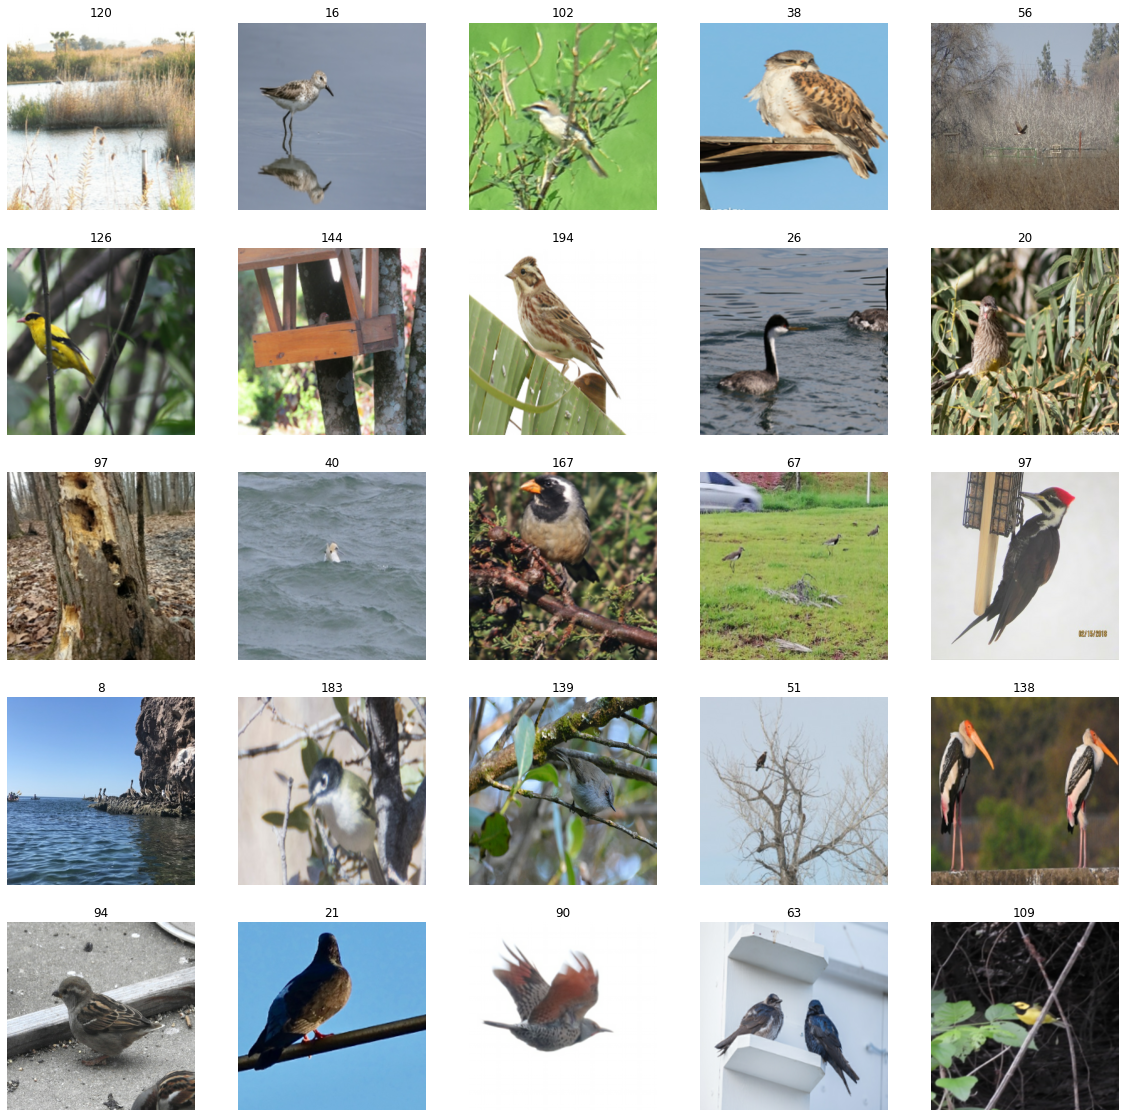

In [26]:
show_batch = ShowBatch(configs)
trainloader = dataset.dataloader(train_paths, train_labels, dataloader_type='train')
sample_imgs, sample_labels = next(iter(trainloader))
show_batch.show_batch(sample_imgs, sample_labels)

In [58]:
# Build the model
tf.keras.backend.clear_session()
model = SimpleSupervisedModel(configs).get_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 200)               409800    
                                                                 
Total params: 23,997,512
Trainable params: 23,944,392
Non-trainable params: 53,120
____________________________________________

In [59]:
# Build pipeline
pipeline = SupervisedPipeline(model, configs, [])

In [60]:
# Train and Evaluate
pipeline.train_and_evaluate(trainloader, validloader)

Epoch 1/20
62/62 [==============================] - 20s 249ms/step - loss: 5.3604 - top@1_acc: 0.0157 - top@5_acc: 0.0621 - val_loss: 5.3362 - val_top@1_acc: 0.0115 - val_top@5_acc: 0.0600
Epoch 2/20
62/62 [==============================] - 14s 232ms/step - loss: 4.9761 - top@1_acc: 0.0298 - top@5_acc: 0.1157 - val_loss: 5.2617 - val_top@1_acc: 0.0220 - val_top@5_acc: 0.0810
Epoch 3/20
62/62 [==============================] - 14s 232ms/step - loss: 4.7273 - top@1_acc: 0.0442 - top@5_acc: 0.1556 - val_loss: 5.2925 - val_top@1_acc: 0.0215 - val_top@5_acc: 0.0905
Epoch 4/20
62/62 [==============================] - 14s 231ms/step - loss: 4.4875 - top@1_acc: 0.0616 - top@5_acc: 0.2061 - val_loss: 5.2924 - val_top@1_acc: 0.0240 - val_top@5_acc: 0.1080
Epoch 5/20
62/62 [==============================] - 14s 231ms/step - loss: 4.1805 - top@1_acc: 0.0935 - top@5_acc: 0.2796 - val_loss: 5.3682 - val_top@1_acc: 0.0285 - val_top@5_acc: 0.1165
Epoch 6/20
62/62 [==============================] - 14s